In [2]:
import cellular_automata as ca
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
def simulate_tumor_growth(time_delay, generations, rows, cols, phi, rho, k1, k2, k3, k4, cancer_init_positions, origin):
    history = {}
    M = ca.initialize_grid(rows, cols, cancer_init_positions)

    for g in range(generations):
        M = ca.simulate_tumor_growth_one_step(M, g, time_delay, history, phi, rho, k1, k2, k3, k4, origin, rows, cols)

    return history

In [4]:
generations = 400
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85

In [5]:
history_delay = simulate_tumor_growth(15, generations, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

In [6]:
tau_values = np.linspace(20, 60, 40)
all_critical_points = []

#Run the simualtiuons for each value of tau and find the critical points
for tau in tau_values:
    time_series = simulate_tumor_growth(tau, generations, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    time_series = np.array([time_series[g]['Nc'] for g in range(generations)])
    peaks_max, _ = find_peaks(time_series)
    peaks_min, _ = find_peaks(-time_series)
    peaks = np.concatenate((peaks_max, peaks_min))
    cp = [time_series[pks] for pks in peaks]

    all_critical_points.append(cp)

    print(peaks)


[ 51  58  65  70  88  90  93  97 119 126 150 154 183 186 215 219 247 249
 251 254 281 309 311 313 315 340 343 378  52  62  68  87  89  91  94  99
 120 149 153 155 184 214 218 220 248 250 252 279 283 310 312 314 339 342
 345]
[  4  21  47  50  53  59  61  63  65  70  75  78  80  83  86  88  94  96
  99 104 106 111 113 115 119 122 126 136 138 143 145 149 152 158 162 166
 171 174 176 180 190 192 197 199 203 212 215 218 228 233 237 239 242 244
 246 249 252 257 259 263 265 271 273 275 280 282 287 290 294 296 301 305
 311 316 324 326 332 337 342 347 350 355 358 362 367 369 375 379 382 385
 389 391 394 396   5  22  48  51  55  60  62  64  66  72  77  79  81  84
  87  92  95  97 100 105 108 112 114 117 120 125 129 137 141 144 148 150
 153 161 164 169 172 175 177 184 191 193 198 201 209 214 216 224 231 236
 238 240 243 245 248 250 255 258 261 264 267 272 274 276 281 284 288 291
 295 299 304 308 312 321 325 331 334 339 346 349 353 357 361 365 368 371
 377 381 383 386 390 392 395 397]
[  3  26  3

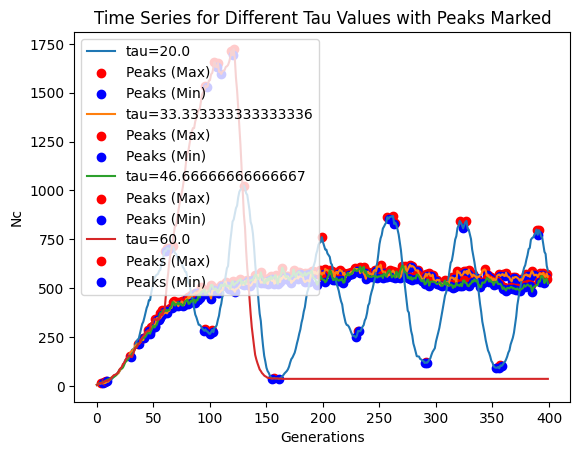

In [70]:

tau_values = np.linspace(20, 60, 4)
all_critical_points = []

time_series_array = []


# Run the simulations for each value of tau and store time series
for tau in tau_values:
    time_series = simulate_tumor_growth(tau, generations, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    time_series = np.array([time_series[g]['Nc'] for g in range(generations)])
    time_series_array.append(time_series)

# Plot the different time series from different tau values in the same plot
for i, time_series in enumerate(time_series_array):
    plt.plot(range(generations), time_series, label=f'tau={tau_values[i]}')

    # Find peaks
    peaks_max, _ = find_peaks(time_series)
    peaks_min, _ = find_peaks(-time_series)  # Pass the negative of time_series for finding minima

    # Mark peaks with red dots
    plt.scatter(peaks_max, time_series[peaks_max], c='red', marker='o', label='Peaks (Max)')
    plt.scatter(peaks_min, time_series[peaks_min], c='blue', marker='o', label='Peaks (Min)')

plt.xlabel('Generations')
plt.ylabel('Nc')
plt.title('Time Series for Different Tau Values with Peaks Marked')
plt.legend()
plt.show()




    # Find peaks for both maxima and minima
    # peaks_max, _ = find_peaks(time_series)
    # peaks_min, _ = find_peaks(-time_series)


    
    # # Combine peaks_max and peaks_min to get all peaks
    # peaks = np.concatenate((peaks_max, peaks_min))
    # print(peaks)
    
    
#     # Create pairs of (peak_max, peak_min)
#     pairs = [(peaks[i], peaks[i+1]) for i in range(0, len(peaks), 2)]
    
#     all_critical_points.append(pairs)

# # Print or use all_critical_points as needed
# print(all_critical_points)

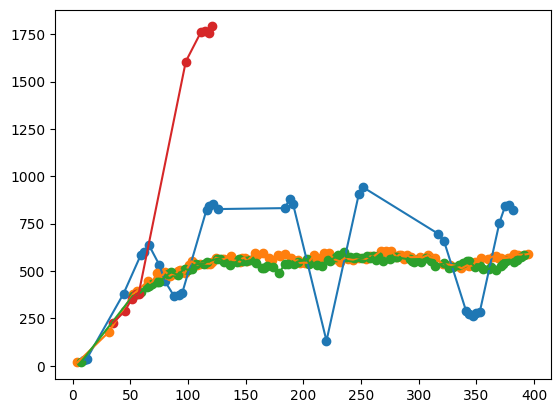

In [75]:
tau_values = np.linspace(20, 60, 4)
peak_max_values_list = {}  # Initialize an empty dictionary



Nc_values = {}

# Run the simulations for each value of tau and store peak_max values
for tau in tau_values:
    time_series = simulate_tumor_growth(tau, generations, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    time_series = np.array([time_series[g]['Nc'] for g in range(generations)])

    Nc_values[tau] = time_series

    # Find peaks
    peaks_max, _ = find_peaks(time_series)

    plt.plot(peaks_max, time_series[peaks_max])
    plt.scatter(peaks_max, time_series[peaks_max], marker='o', label='Peaks (Max)')
    
    



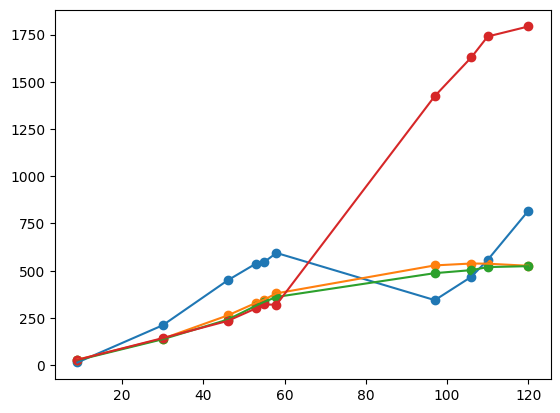

In [74]:
tau_values = np.linspace(20, 60, 4)
peak_min_values_list = {}  # Initialize an empty dictionary



Nc_values_min = {}

# Run the simulations for each value of tau and store peak_max values
for tau in tau_values:
    time_series = simulate_tumor_growth(tau, generations, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    time_series = np.array([time_series[g]['Nc'] for g in range(generations)])

    Nc_values_min[tau] = time_series

    # Find peaks
    peaks_mix, _ = find_peaks(-time_series)

    plt.plot(peaks_min, time_series[peaks_min])
    plt.scatter(peaks_min, time_series[peaks_min], marker='o', label='Peaks (Min)')

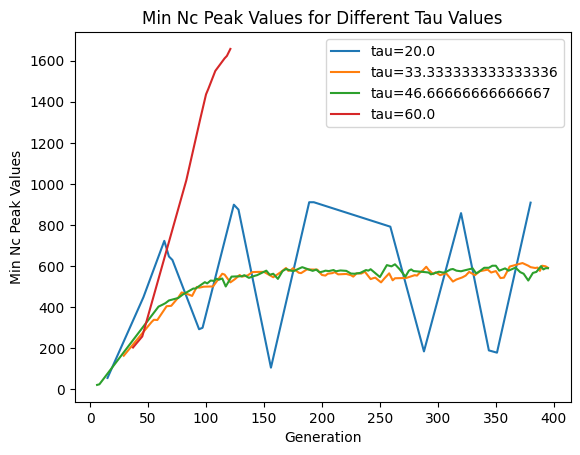

In [59]:
tau_values = np.linspace(20, 60, 4)
peak_min_values_list = {}  # Initialize an empty dictionary

# Run the simulations for each value of tau and store peak_max values
for tau in tau_values:
    time_series = simulate_tumor_growth(tau, generations, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    time_series = np.array([time_series[g]['Nc'] for g in range(generations)])

    # Find peaks
    peaks_min, _ = find_peaks(time_series)
    
    # Store each peak_max value in a list with its corresponding generation
    peak_min_values = [(g, time_series[g]) for g in peaks_min]
    
    # Store the list of peak_max values for the current tau in the dictionary
    peak_min_values_list[tau] = peak_min_values

# Plot the dictionary of peak_max values_list for each tau value versus generation number in the same plot
for tau, peak_min_values in peak_min_values_list.items():
    generations_list, values_list = zip(*peak_min_values)  # Unzip the list of tuples
    plt.plot(generations_list, values_list, label=f'tau={tau}')

plt.xlabel('Generation')
plt.ylabel('Min Nc Peak Values')
plt.title('Min Nc Peak Values for Different Tau Values')
plt.legend()
plt.show()

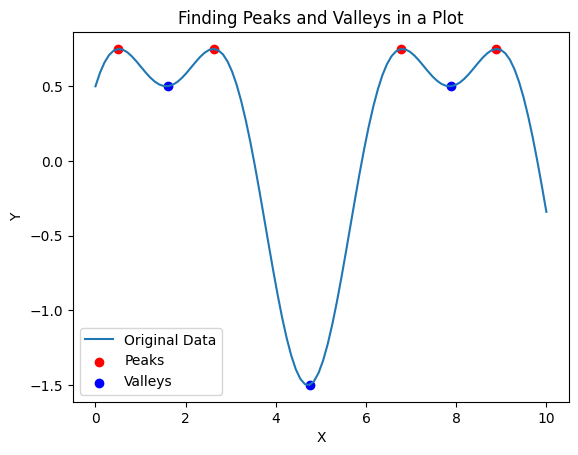

Peaks Array:
[[0.50505051 0.74973923]
 [2.62626263 0.74994848]
 [6.76767677 0.74882751]
 [8.88888889 0.74988752]]

Valleys Array:
[[ 1.61616162  0.50102777]
 [ 4.74747475 -1.49815405]
 [ 7.87878788  0.50030756]]


In [47]:
import numpy as np
from scipy.signal import find_peaks, find_peaks_cwt
import matplotlib.pyplot as plt

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.5 * np.cos(2 * x)  # Example function, you can replace this with your data

# Find peaks
peaks, _ = find_peaks(y)

# Find valleys (minima)
valleys, _ = find_peaks(-y)

# Plot the original data
plt.plot(x, y, label='Original Data')

# Mark peaks with red dots
plt.scatter(x[peaks], y[peaks], c='red', marker='o', label='Peaks')

# Mark valleys with blue dots
plt.scatter(x[valleys], y[valleys], c='blue', marker='o', label='Valleys')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Finding Peaks and Valleys in a Plot')
plt.legend()
plt.show()

# Store peaks and valleys in arrays
peaks_array = np.array([x[peaks], y[peaks]]).T
valleys_array = np.array([x[valleys], y[valleys]]).T

print("Peaks Array:")
print(peaks_array)

print("\nValleys Array:")
print(valleys_array)


In [ ]:
tau_values = np.linspace(20, 60, 4)
peak_min_values_list = {}  # Initialize an empty dictionary

# Run the simulations for each value of tau and store peak_max values
for tau in tau_values:
    time_series = simulate_tumor_growth(tau, generations, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    time_series = np.array([time_series[g]['Nc'] for g in range(generations)])

    # Find peaks
    peaks_min, _ = find_peaks(time_series)
    
    # Store each peak_max value in a list with its corresponding generation
    peak_min_values = [(g, time_series[g]) for g in peaks_min]
    
    # Store the list of peak_max values for the current tau in the dictionary
    peak_min_values_list[tau] = peak_min_values

# Plot the dictionary of peak_max values_list for each tau value versus generation number in the same plot
for tau, peak_min_values in peak_min_values_list.items():
    generations_list, values_list = zip(*peak_min_values)  # Unzip the list of tuples
    plt.plot(generations_list, values_list, label=f'tau={tau}')

plt.xlabel('Generation')
plt.ylabel('Min Nc Peak Values')
plt.title('Min Nc Peak Values for Different Tau Values')
plt.legend()
plt.show()